install ucimlrepo

In [2]:
!pip install ucimlrepo

Import necessary libraries

In [3]:
# Import necessary libraries
# Importing the pandas library for data manipulation and analysis
import pandas as pd
# Importing the numpy library for numerical computations
import numpy as np
# Importing the fetch_ucirepo function to access UCI Machine Learning Repository datasets
from ucimlrepo import fetch_ucirepo
# Importing PCA for dimensionality reduction
from sklearn.decomposition import PCA
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
# Perform logistic regression for classification tasks
from sklearn.linear_model import LogisticRegression
# Use Random Forest for classification tasks
from sklearn.ensemble import RandomForestClassifier
 # Use XGBoost for efficient and flexible gradient boosting
from xgboost import XGBClassifier
# Generate classification metrics and calculate accuracy
from sklearn.metrics import classification_report, accuracy_score
# Detect anomalies or outliers using Isolation Forest
from sklearn.ensemble import IsolationForest
 # Create static, interactive, and publication-quality visualizations
import matplotlib.pyplot as plt
# Generate attractive and informative statistical graphics
import seaborn as sns
# Calculate the z-scores of an array for standardizing and detecting outliers
from scipy.stats import zscore


Fetch and load dataset

In [4]:
# Load the UCI breast cancer dataset
breast_cancer_data = fetch_ucirepo(id=17)

# Extract features and target
X = breast_cancer_data.data.features
y = breast_cancer_data.data.targets

# Display dataset metadata
print("Dataset Metadata:")
print(breast_cancer_data.metadata)
print(X)
print(y)


Dataset Metadata:
{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal

Exploratory Data Analysis

In [5]:
# Check for missing values,It returns a Data as X, where each element is True if the corresponding value is NaN (missing) and False if the value is not missing
print("Missing values in each column:\n", X.isnull().sum())
print("Missing values in target class:\n", y.isnull().sum())

Missing values in each column:
 radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64
Missing values in target class:
 Diagnosis    0
dtype: int64


no missing values in both data and target class

In [6]:
# Check the target class distribution,This function is applied to the target variable y, which contains the class labels (e.g., malignant or benign for the breast cancer dataset).
print("\nTarget class distribution:\n", y.value_counts())


Target class distribution:
 Diagnosis
B            357
M            212
Name: count, dtype: int64


In [7]:
X.dtypes

,0
radius1,float64
texture1,float64
perimeter1,float64
area1,float64
smoothness1,float64
compactness1,float64
concavity1,float64
concave_points1,float64
symmetry1,float64
fractal_dimension1,float64


In [8]:
X.describe

<bound method NDFrame.describe of      radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010          0.14710     0.2419             0.07871  ...   25.380   
1       0.08690          0.07017     0.1812             0.05667  ...   24.990   
2       0.19740          0.12790     0.2069             0.05999  ...   23.570   
3       0.24140          0.10520     0.2597             0.09744  ...   14.910   
4       0.19800          0.10430     0.1809             0.05883  ...   22.540   
..          ...              ...        ...                 ...  ...      ...   
564     0.24390          0.13890     0.1726             0.05623  ...   25.450   
565     0.14400          0.09791     0.1752             0.05533  ...   23.690   
566     0.09251          0.05302     0.1590             0.05648  ...   18.980   
567     0.35140          0.15200     0.2397             0.07016  ...   25.740   
568     0.00000          0.00000     0.1587             0.05884  ...    9.456   

     texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0       17.33      184.60  2019.0      0.16220       0.66560      0.7119   
1       23.41      158.80  1956.0      0.12380       0.18660      0.2416   
2       25.53      152.50  1709.0      0.14440       0.42450      0.4504   
3       26.50       98.87   567.7      0.20980       0.86630      0.6869   
4       16.67      152.20  1575.0      0.13740       0.20500      0.4000   
..        ...         ...     ...          ...           ...         ...   
564     26.40      166.10  2027.0      0.14100       0.21130      0.4107   
565     38.25      155.00  1731.0      0.11660       0.19220      0.3215   
566     34.12      126.70  1124.0      0.11390       0.30940      0.3403   
567     39.42      184.60  1821.0      0.16500       0.86810      0.9387   
568     30.37       59.16   268.6      0.08996       0.06444      0.0000   

     concave_points3  symmetry3  fractal_dimension3  
0             0.2654     0.4601             0.11890  
1             0.1860     0.2750             0.08902  
2             0.2430     0.3613             0.08758  
3             0.2575     0.6638             0.17300  
4             0.1625     0.2364             0.07678  
..               ...        ...                 ...  
564           0.2216     0.2060             0.07115  
565           0.1628     0.2572             0.06637  
566           0.1418     0.2218             0.07820  
567           0.2650     0.4087             0.12400  
568           0.0000     0.2871             0.07039  

[569 rows x 30 columns]>

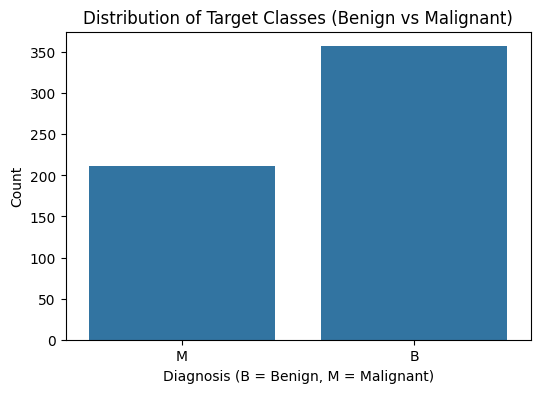

In [9]:
# Visualize the distribution of target classes
plt.figure(figsize=(6, 4))
sns.countplot(x=y['Diagnosis'])
plt.title("Distribution of Target Classes (Benign vs Malignant)")
plt.xlabel("Diagnosis (B = Benign, M = Malignant)")
plt.ylabel("Count")
plt.show()

So it is evident that it has a class imbalance.

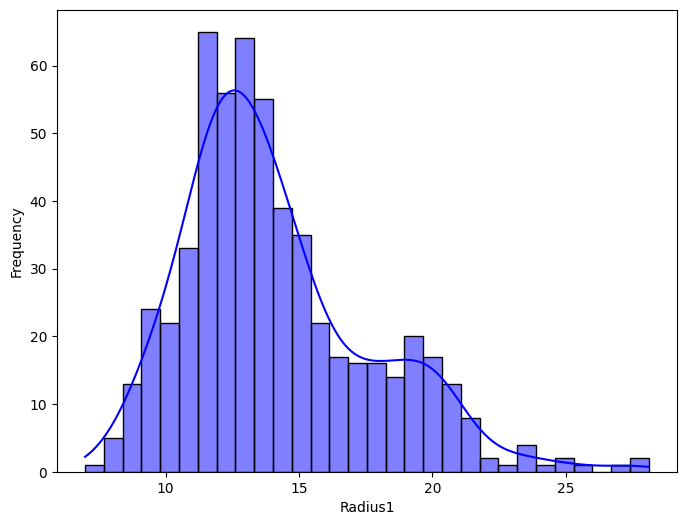

In [10]:
# Step 1: Visualize the distribution of a key feature (e.g., 'radius1')
plt.figure(figsize=(8, 6))
sns.histplot(X['radius1'], bins=30, kde=True, color='blue')
plt.xlabel("Radius1")
plt.ylabel("Frequency")
plt.show()

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


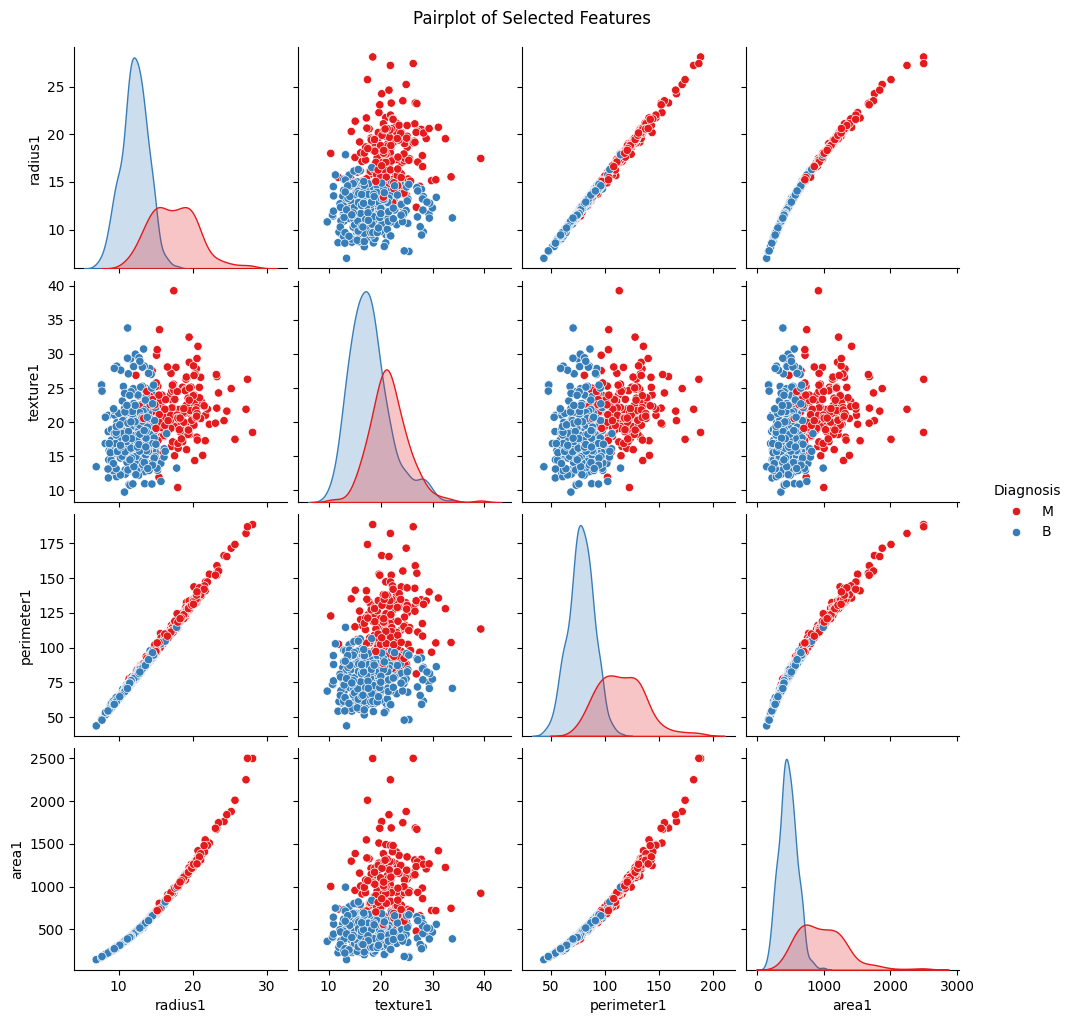

In [11]:
#Define the features to plot for the pairplot
features_to_plot = ['radius1', 'texture1', 'perimeter1', 'area1']
print(X.columns)
df_pairplot = X[features_to_plot].join(y["Diagnosis"])
sns.pairplot(df_pairplot, hue='Diagnosis', palette="Set1", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

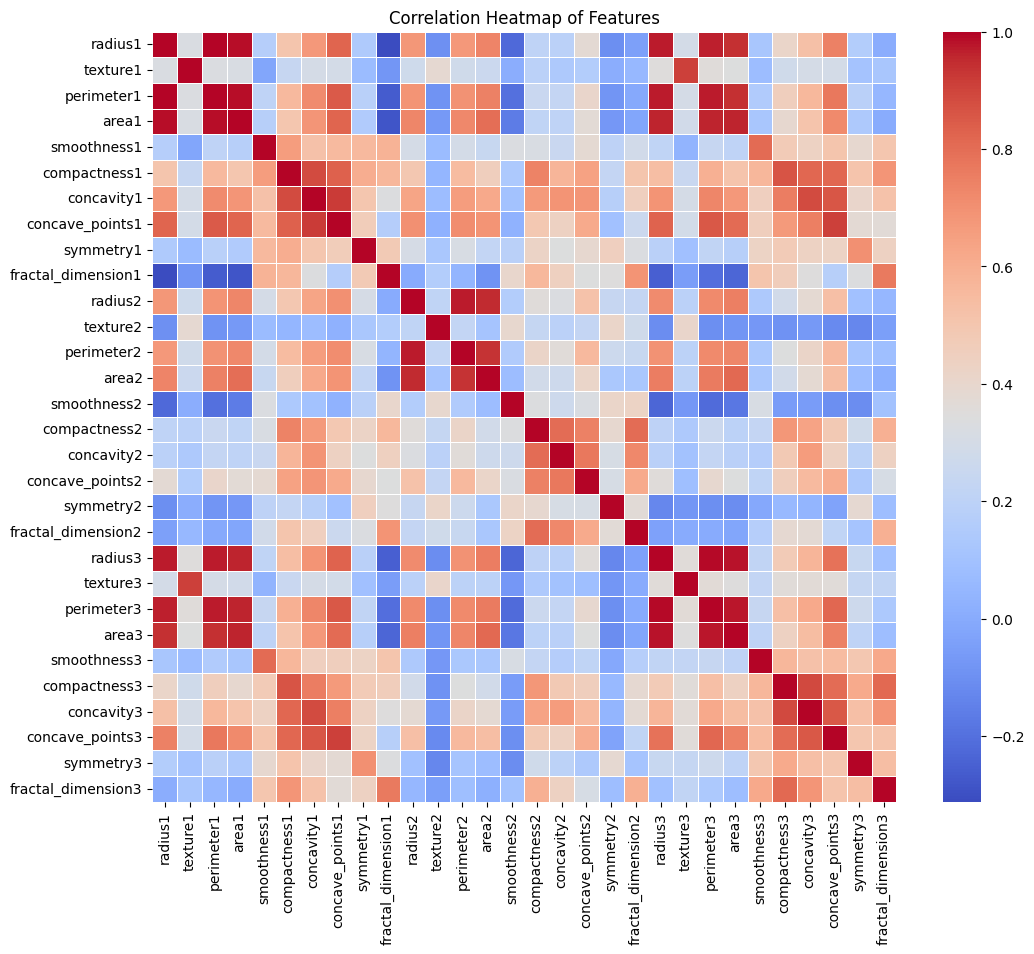

In [12]:
# Correlation heatmap to check relationships between variables
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [13]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Find pairs of highly correlated features
high_corr = corr_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr[(high_corr.abs() > 0.8) & (high_corr < 1.0)]

print(high_corr_pairs)


perimeter1       radius1            0.997855
radius1          perimeter1         0.997855
perimeter3       radius3            0.993708
radius3          perimeter3         0.993708
radius1          area1              0.987357
                                      ...   
concavity2       compactness2       0.801268
compactness3     concave_points3    0.801080
concave_points3  compactness3       0.801080
area2            area1              0.800086
area1            area2              0.800086
Length: 88, dtype: float64


Preprocessing dataset

Drop highly correlated features

In [14]:
# Drop the columns
X.drop(["radius1", "radius3", "compactness2", "concave_points3", "area2"], axis=1, inplace=True)

<ipython-input-14-d17c11abb808>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["radius1", "radius3", "compactness2", "concave_points3", "area2"], axis=1, inplace=True)


In [15]:
# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
# Show the scaled data
print("\nScaled data (first 5 rows of X_train):\n", pd.DataFrame(X_train_scaled, columns=X.columns).head())


Scaled data (first 5 rows of X_train):
    texture1  perimeter1     area1  smoothness1  compactness1  concavity1  \
0 -2.073335    1.269934  0.984375     1.568466      3.283515    2.652874   
1 -0.353632    1.685955  1.908708    -0.826962     -0.487072   -0.023846   
2  0.456187    1.566503  1.558884     0.942210      1.052926    1.363478   
3  0.253732   -0.592687 -0.764464     3.283553      3.402909    1.915897   
4 -1.151816    1.776573  1.826229     0.280372      0.539340    1.371011   

   concave_points1  symmetry1  fractal_dimension1   radius2  ...  symmetry2  \
0         2.532475   2.217515            2.255747  2.489734  ...   1.148757   
1         0.548144   0.001392           -0.868652  0.499255  ...  -0.805450   
2         2.037231   0.939685           -0.398008  1.228676  ...   0.237036   
3         1.451707   2.867383            4.910919  0.326373  ...   4.732680   
4         1.428493  -0.009560           -0.562450  1.270543  ...  -0.361092   

   fractal_dimension2  text

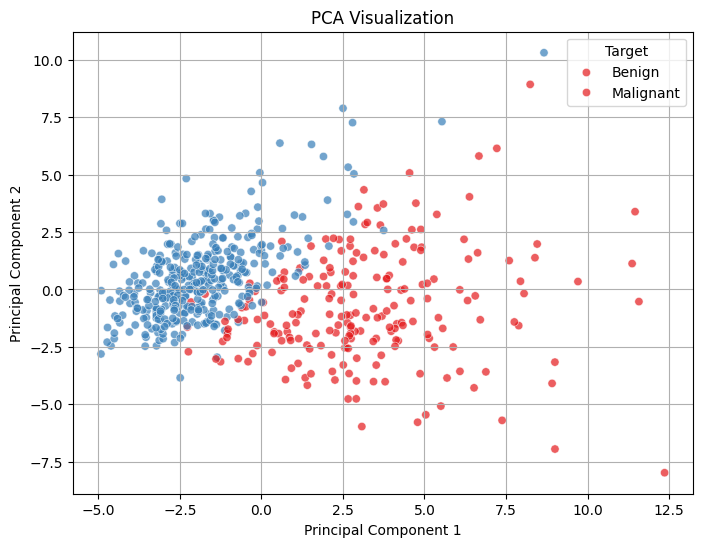

In [16]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_scaled)

# Visualize PCA components
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Target"] = y['Diagnosis']

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Target", data=pca_df, palette="Set1", alpha=0.7)
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Target", labels=["Benign", "Malignant"])
plt.grid()
plt.show()


In [17]:
# Detect outliers using Z-score
z_scores = np.abs(zscore(X_pca))
outliers_removed = (z_scores < 3).all(axis=1)  # Keep rows with Z-score < 3
X_clean = X_pca[outliers_removed]
y_clean = y[outliers_removed]

print(f"Data after outlier removal: {X_clean.shape[0]} rows")


Data after outlier removal: 558 rows


In [18]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

model

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

Logistic Regression is a statistical method used for classifying data into two or more categories. It predicts the probability of an event occurring based on input features.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Logistic Regression Training Accuracy: 0.9506726457399103
Logistic Regression Test Accuracy: 0.9375

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        69
           1       0.93      0.91      0.92        43

    accuracy                           0.94       112
   macro avg       0.94      0.93      0.93       112
weighted avg       0.94      0.94      0.94       112



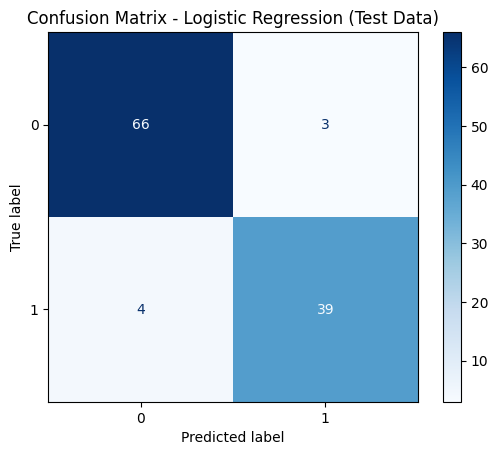

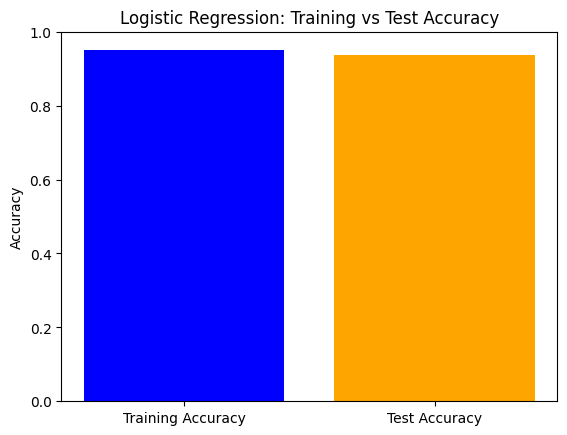

ROC-AUC Score: 0.98


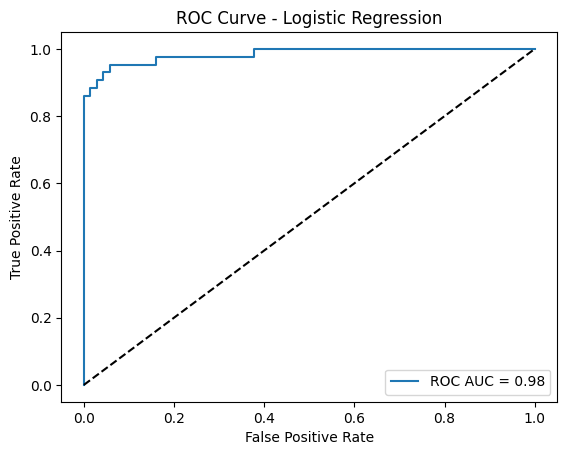

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Convert labels to numerical values (B = 0, M = 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train_encoded)

# Make predictions
y_train_pred_log_reg = log_reg.predict(X_train)
y_test_pred_log_reg = log_reg.predict(X_test)
y_test_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve

# Evaluate Logistic Regression model
train_accuracy = accuracy_score(y_train_encoded, y_train_pred_log_reg)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred_log_reg)

print("Logistic Regression Training Accuracy:", train_accuracy)
print("Logistic Regression Test Accuracy:", test_accuracy)
print("\nClassification Report (Test Data):\n", classification_report(y_test_encoded, y_test_pred_log_reg))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_log_reg)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Test Data)")
plt.show()

# Plot Training vs. Test Accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('Logistic Regression: Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test_encoded, y_test_prob_log_reg)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_prob_log_reg)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9196428571428571

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        69
           1       0.93      0.86      0.89        43

    accuracy                           0.92       112
   macro avg       0.92      0.91      0.91       112
weighted avg       0.92      0.92      0.92       112



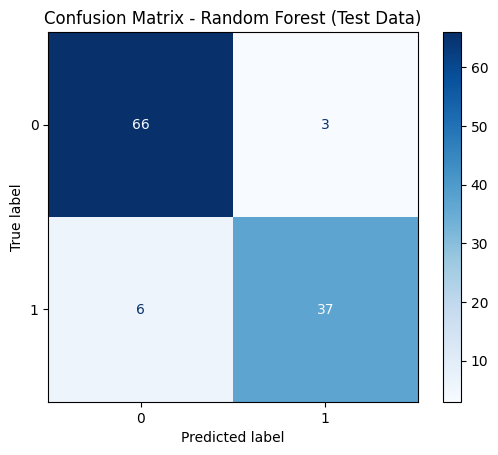

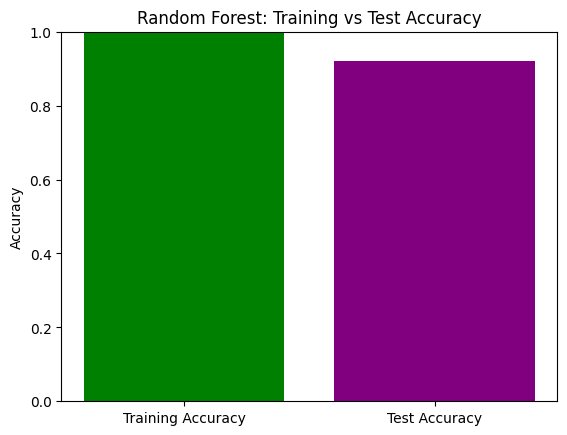

ROC-AUC Score: 0.96


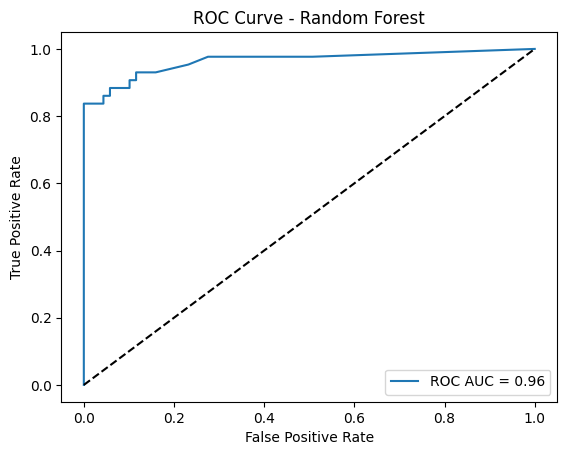

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Convert labels to numerical values (if needed)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_encoded)

# Make predictions on both training and test datasets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
y_test_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve

# Evaluate Random Forest model
train_accuracy_rf = accuracy_score(y_train_encoded, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test_encoded, y_test_pred_rf)

print("Random Forest Training Accuracy:", train_accuracy_rf)
print("Random Forest Test Accuracy:", test_accuracy_rf)
print("\nClassification Report (Test Data):\n", classification_report(y_test_encoded, y_test_pred_rf))

# Confusion matrix for test data
conf_matrix_rf = confusion_matrix(y_test_encoded, y_test_pred_rf)

# Plot Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest (Test Data)")
plt.show()

# Plot Training vs. Test Accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracies_rf = [train_accuracy_rf, test_accuracy_rf]

plt.bar(labels, accuracies_rf, color=['green', 'purple'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('Random Forest: Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test_encoded, y_test_prob_rf)
print(f"ROC-AUC Score: {roc_auc_rf:.2f}")

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_encoded, y_test_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"ROC AUC = {roc_auc_rf:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [27]:
# Convert target variable into numerical values
y_clean = y_clean['Diagnosis'].map({'B': 0, 'M': 1})

# Verify the transformation
print(y_clean.unique())  # Should print: [0, 1]


[1 0]


XGBoost Training Accuracy: 0.9887892376681614
XGBoost Test Accuracy: 0.9107142857142857

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       284
           1       0.98      0.99      0.98       162

    accuracy                           0.99       446
   macro avg       0.99      0.99      0.99       446
weighted avg       0.99      0.99      0.99       446


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        69
           1       0.92      0.84      0.88        43

    accuracy                           0.91       112
   macro avg       0.91      0.90      0.90       112
weighted avg       0.91      0.91      0.91       112



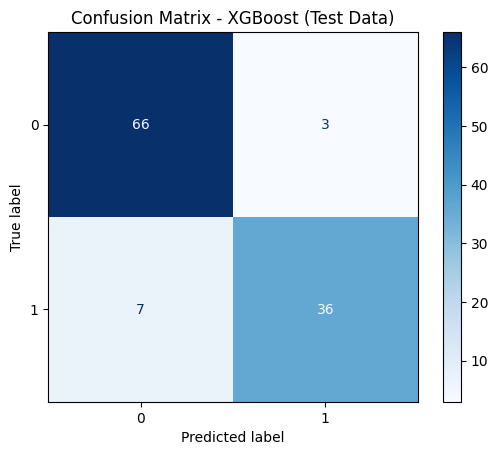

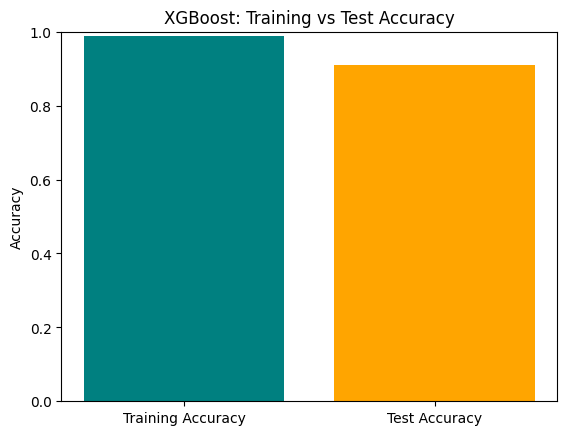

ROC-AUC Score: 0.97


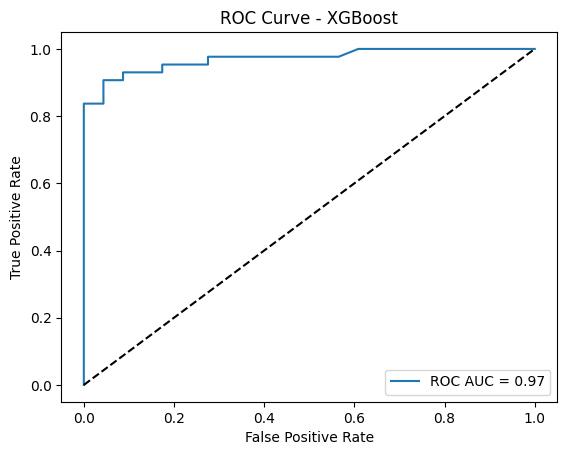

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Random Sampling - Split the cleaned data into training and testing sets with shuffling
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, shuffle=True)

# Convert data into NumPy arrays (optional step based on your setup)
X_train_clean = np.array(X_train)
X_test_clean = np.array(X_test)
y_train_clean = np.array(y_train)
y_test_clean = np.array(y_test)

# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train_clean, y_train_clean)

# Make predictions on both training and test datasets
y_train_pred_xgb = xgb_model.predict(X_train_clean)
y_test_pred_xgb = xgb_model.predict(X_test_clean)
y_test_prob_xgb = xgb_model.predict_proba(X_test_clean)[:, 1]  # Probabilities for the positive class

# Evaluate the XGBoost model
train_accuracy_xgb = accuracy_score(y_train_clean, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test_clean, y_test_pred_xgb)

print("XGBoost Training Accuracy:", train_accuracy_xgb)
print("XGBoost Test Accuracy:", test_accuracy_xgb)

print("\nClassification Report (Training Data):")
print(classification_report(y_train_clean, y_train_pred_xgb))

print("\nClassification Report (Test Data):")
print(classification_report(y_test_clean, y_test_pred_xgb))

# Confusion matrix for test data
conf_matrix_xgb = confusion_matrix(y_test_clean, y_test_pred_xgb)

# Plot Confusion Matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=[0, 1])
disp_xgb.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost (Test Data)")
plt.show()

# Plot Training vs. Test Accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracies_xgb = [train_accuracy_xgb, test_accuracy_xgb]

plt.bar(labels, accuracies_xgb, color=['teal', 'orange'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('XGBoost: Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test_clean, y_test_prob_xgb)
print(f"ROC-AUC Score: {roc_auc_xgb:.2f}")

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_clean, y_test_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC AUC = {roc_auc_xgb:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
